<h1> Geometric Operations and Other Mathematical Tools</h1>


Estimated time needed: **40** minutes


<h2>Objectives</h2>


In the first part of the lab, you will apply geometric transformations to an image. This allows you to perform different operations like reshape translation i.e. to shift, reshape and rotate the image. In the second part of the lab, you will learn how to apply some basic array and matrix operations to the image. 


<ul>
    <li><a href='#PT'> Geometric Operations  </a>
        <ul>
            <li>Scaling  </li>
            <li>Translation</li>
            <li>Rotation</li>   
          </ul>
        <li><a href='#PT'>  Mathematical Operations   </a>
        <ul>
            <li>Array Operations  </li>
            <li>Matix Operations n</li> 
          </ul>


</ul>


----


Download the image for the lab:


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png  

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


We will import the following:


In [ ]:
import matplotlib.pyplot as plt # thư viện vẽ biểu đồ và hiển thị ảnh
import cv2 # thư viện xử lý ảnh opencv
import numpy as np # thư viện tính toán mảng số học

First, let's define a helper function to plot two images side-by-side. You will not need to understand this code this moment, but this function will be used repeatedly in this tutorial to showcase the results. 


In [ ]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"): # hàm hiển thị hai ảnh cạnh nhau
    plt.figure(figsize=(10,10)) # tạo khung hiển thị kích thước ảnh với tỉ lệ 10x10
    plt.subplot(1, 2, 1) # hiển thị ảnh thứ nhất
    plt.imshow(image_1,cmap="gray") # hiển thị ảnh với bảng màu xám
    plt.title(title_1) # đặt tiêu đề cho ảnh thứ nhất
    plt.subplot(1, 2, 2) # hiển thị ảnh thứ hai
    plt.imshow(image_2,cmap="gray") # hiển thị ảnh với bảng màu xám
    plt.title(title_2) # hiển thị tiêu đề cho ảnh thứ hai
    plt.show() # hiển thị kết quả

#  Geometric Transformations


 Geometric transformations allow you to perform different operations like translation i.e. to shift, reshape and rotate the image.


## Scaling 


We can resize an image using the function `resize()` from `cv2` module for this purpose.  You can specify the scaling factor or the size of the image:


Consider the following image with the corresponding intensity values:


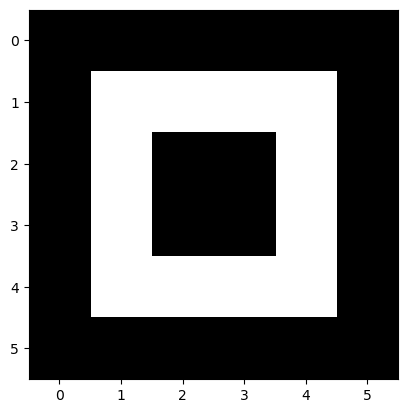

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])

In [ ]:
toy_image = np.zeros((6,6)) # tạo ảnh 6x6 toàn giá trị 0
toy_image[1:5,1:5]=255 # gán khối vuông giữa thành trắng
toy_image[2:4,2:4]=0 # tạo lỗ đen ở trung tâm
plt.imshow(toy_image,cmap='gray') # hiển thị ảnh xám
plt.show() # hiển thị ra màn hình
toy_image # in ra ma trận ảnh

We can rescale along a specific axis:

- `fx`: scale factor along the horizontal axis  
- `fy`: scale factor along the vertical axis


The parameter interpolation estimates pixel values based on neighboring pixels. <code>INTER_NEAREST</code> uses the nearest pixel and <code>INTER_CUBIC</code> uses several pixels near the pixel value we would like to estimate.


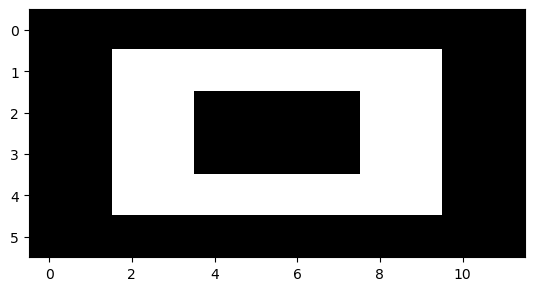

In [ ]:
new_toy = cv2.resize(toy_image,None,fx=2, fy=1, interpolation = cv2.INTER_NEAREST ) # resize ảnh theo tỉ lệ với nội suy nearest
plt.imshow(new_toy,cmap='gray') # hiển thị ảnh mới
plt.show() # hiển thị ra màn hình

Consider the following image:


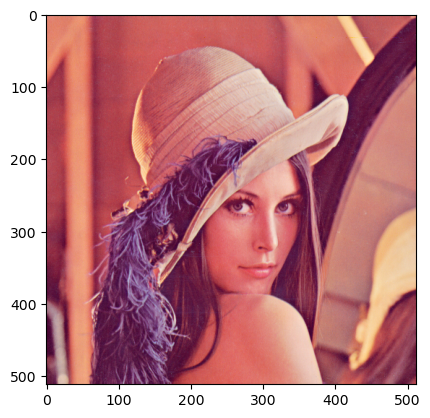

In [ ]:
image = cv2.imread("lenna.png") # đọc ảnh bằng opencv
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # chuyển bgr sang rgb và hiển thị
plt.show() # hiển thị ra màn hình

We can scale the horizontal axis by two and leave the vertical axis as is:


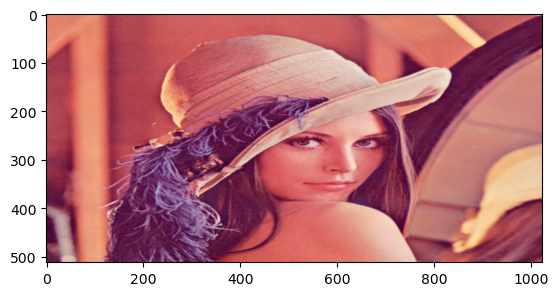

old image shape: (512, 512, 3) new image shape: (512, 1024, 3)


In [ ]:
new_image = cv2.resize(image, None, fx=2, fy=1, interpolation=cv2.INTER_CUBIC) # resize ảnh với nội suy cubic
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) # chuyển bgr sang rgb và hiển thị
plt.show() # hiển thị ra màn hình
print("old image shape:", image.shape, "new image shape:", new_image.shape) # in kích thước ảnh cũ và mới

In the same manner, we can scale the vertical axis by two:


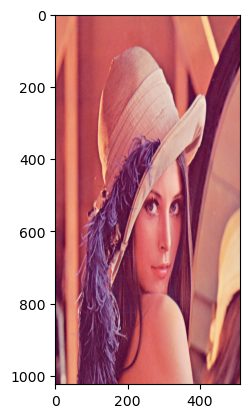

old image shape: (512, 512, 3) new image shape: (1024, 512, 3)


In [ ]:
new_image = cv2.resize(image, None, fx=1, fy=2, interpolation=cv2.INTER_CUBIC) # resize ảnh theo chiều dọc với nội suy cubic
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) # chuyển bgr sang rgb và hiển thị
plt.show() # hiển thị ra màn hình
print("old image shape:", image.shape, "new image shape:", new_image.shape) # in kích thước ảnh cũ và mới

We can scale the horizontal axis and vertical axis by two.


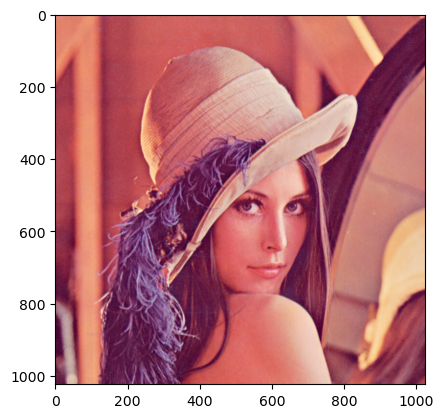

old image shape: (512, 512, 3) new image shape: (1024, 1024, 3)


In [ ]:
new_image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC) # resize ảnh theo cả hai chiều với nội suy cubic
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) # chuyển bgr sang rgb và hiển thị
plt.show() # hiển thị ra màn hình
print("old image shape:", image.shape, "new image shape:", new_image.shape) # in kích thước ảnh cũ và mới

We can also shrink the image by setting the scaling factor to a real number between 0 and 1:


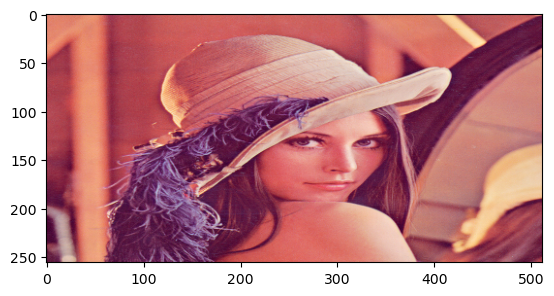

old image shape: (512, 512, 3) new image shape: (256, 512, 3)


In [ ]:
new_image = cv2.resize(image, None, fx=1, fy=0.5, interpolation=cv2.INTER_CUBIC) # resize ảnh giảm chiều cao với nội suy cubic
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) # chuyển bgr sang rgb và hiển thị
plt.show() # hiển thị ra màn hình
print("old image shape:", image.shape, "new image shape:", new_image.shape) # in kích thước ảnh cũ và mới

We can  also specify the number of rows and columns:


In [ ]:
rows = 100 # số hàng của ảnh
cols = 200 # số cột của ảnh

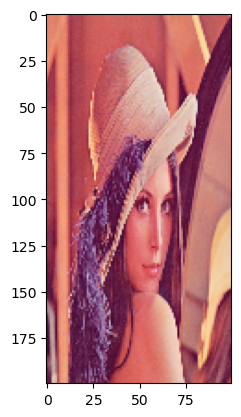

old image shape: (512, 512, 3) new image shape: (200, 100, 3)


In [ ]:
new_image = cv2.resize(image, (100, 200), interpolation=cv2.INTER_CUBIC) # resize ảnh về kích thước cố định
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) # chuyển bgr sang rgb và hiển thị
plt.show() # hiển thị ra màn hình
print("old image shape:", image.shape, "new image shape:", new_image.shape) # in kích thước ảnh cũ và mới

## Translation


Translation is  when you  shift the location of the image. <code>tx</code> is the number of pixels you shift the location in the horizontal direction and <code>ty</code> is the number of pixels you shift in the vertical direction. You can create the transformation matrix $M$ to shift the image. 

In this example, we shift the image 100 pixels horizontally:


In [ ]:
tx = 100 # độ tịnh tiến theo trục x
ty = 0 # độ tịnh tiến theo trục y
M = np.float32([[1, 0, tx], [0, 1, ty]]) # tạo ma trận biến đổi affine tịnh tiến
M # hiển thị ma trận M

array([[  1.,   0., 100.],
       [  0.,   1.,   0.]], dtype=float32)

The shape of the image is given by:


In [ ]:
rows, cols, _ = image.shape # lấy số hàng, số cột và số kênh màu của ảnh

We use the function <code>warpAffine</code> from the <code>cv2</code> module. The first input parater is an image array, the second input parameter is the transformation matrix <code>M</code>, and the final input paramter is the length and width of the output image $(cols,rows)$:


In [ ]:
new_image = cv2.warpAffine(image, M, (cols, rows)) # áp dụng phép biến đổi affine để tịnh tiến ảnh

We can plot the image; the portions of the image that do not have any intensities are set to zero:


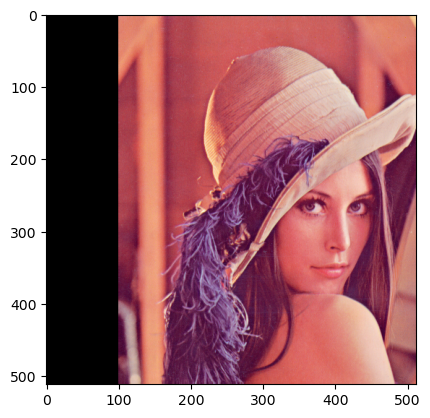

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) # chuyển bgr sang rgb và hiển thị
plt.show() # hiển thị ra màn hình

We can see some of the original image has been cut off. We can fix this by changing the output image size: <code>(cols + tx,rows + ty)</code>:


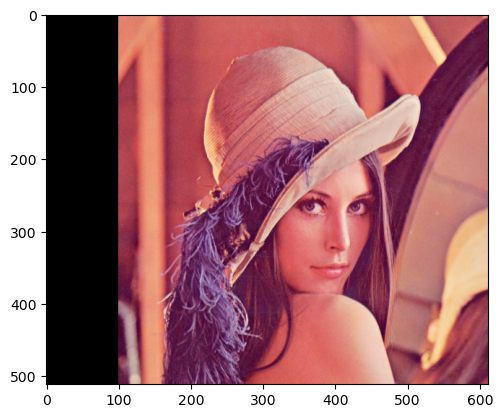

In [ ]:
new_image = cv2.warpAffine(image, M, (cols + tx, rows + ty)) # tịnh tiến ảnh và mở rộng kích thước khung
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) # chuyển bgr sang rgb và hiển thị
plt.show() # hiển thị ra màn hình

We can shift the image horizontally:


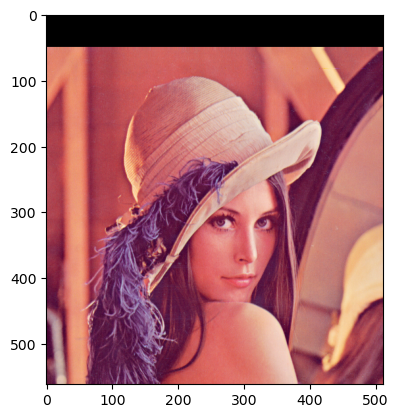

In [ ]:
tx = 0 # độ tịnh tiến theo trục x
ty = 50 # độ tịnh tiến theo trục y
M = np.float32([[1, 0, tx], [0, 1, ty]]) # tạo ma trận biến đổi affine tịnh tiến
new_iamge = cv2.warpAffine(image, M, (cols + tx, rows + ty)) # áp dụng tịnh tiến và mở rộng khung ảnh
plt.imshow(cv2.cvtColor(new_iamge, cv2.COLOR_BGR2RGB)) # chuyển bgr sang rgb và hiển thị
plt.show() # hiển thị ra màn hình

## Rotation 


We can rotate an image by angle θ which is achieved by the Rotation Matrix <code>getRotationMatrix2D</code>.


<p><code>center</code>: Center of the rotation in the source image. We will only use the center of the image.</p>
<p><code>angle</code>: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).</p>
<p><code>scale</code>: Isotropic scale factor, in this course the value will be one.</p>


We can rotate our toy image by 45 degrees:


In [ ]:
theta = 45.0 # góc xoay ảnh
M = cv2.getRotationMatrix2D(center=(3, 3), angle=theta, scale=1) # tạo ma trận xoay quanh tâm (3,3)
new_toy_image = cv2.warpAffine(toy_image, M, (6, 6)) # áp dụng phép xoay cho ảnh toy

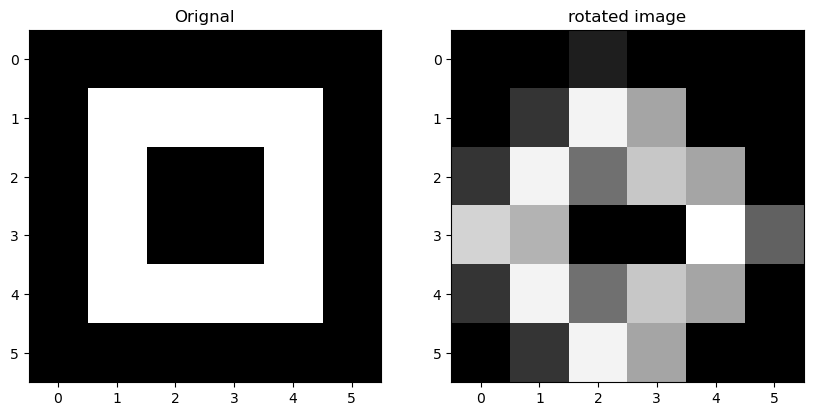

In [ ]:
plot_image(toy_image, new_toy_image, title_1="Orignal", title_2="rotated image") # hiển thị ảnh gốc và ảnh đã xoay

Looking at intensity values, we see that many values have been interpolated:


In [ ]:
new_toy_image # hiển thị ma trận ảnh đã xoay

array([[  0.        ,   0.        ,  28.38867188,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  47.8125    , 223.125     , 151.40625   ,
          0.        ,   0.        ],
       [ 47.8125    , 223.125     , 103.59375   , 183.28125   ,
        151.40625   ,   0.        ],
       [195.234375  , 165.10253906,   0.        ,   0.        ,
        234.82910156,  89.89746094],
       [ 47.8125    , 223.125     , 103.59375   , 183.28125   ,
        151.40625   ,   0.        ],
       [  0.        ,  47.8125    , 223.125     , 151.40625   ,
          0.        ,   0.        ]])

We can perform the same operation on color images:


In [ ]:
cols, rows, _ = image.shape # lấy số cột, số hàng và số kênh màu của ảnh

In [ ]:
M = cv2.getRotationMatrix2D(center=(cols // 2 - 1, rows // 2 - 1), angle=theta, scale=1) # tạo ma trận xoay quanh tâm ảnh
new_image = cv2.warpAffine(image, M, (cols, rows)) # áp dụng phép xoay cho ảnh

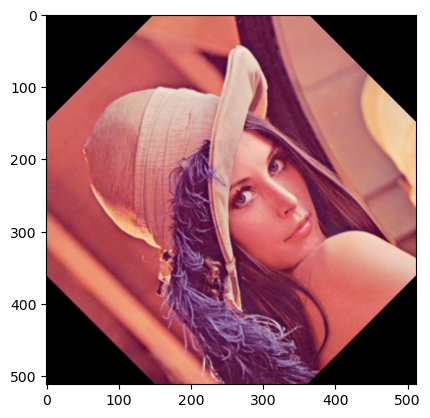

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) # chuyển bgr sang rgb và hiển thị
plt.show() # hiển thị ra màn hình

# Mathematical Operations 


## Array Operations 


We can perform array operations on an image; Using Python broadcasting, we can add a constant to each pixel's intensity value. 


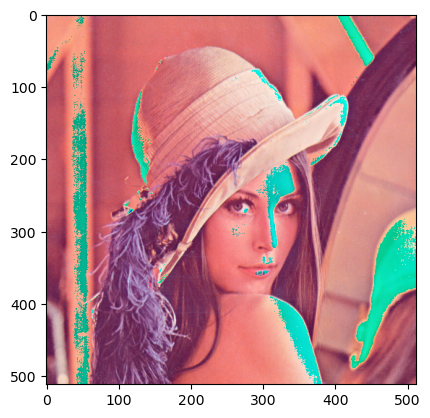

In [ ]:
new_image = image + 20 # tăng giá trị pixel lên 20
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) # chuyển bgr sang rgb và hiển thị
plt.show() # hiển thị ra màn hình

We can also multiply every pixel's intensity value by a constant value.


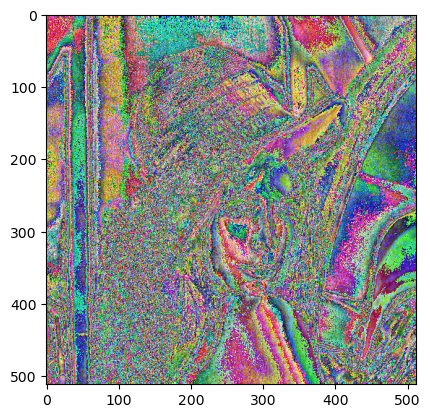

In [ ]:
new_image = 10 * image # nhân giá trị pixel lên 10 lần
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) # chuyển bgr sang rgb và hiển thị
plt.show() # hiển thị ra màn hình

We can add the elements of two arrays of equal shape. In this example, we generate an array of random noises with the same shape and data type as our image.


In [ ]:
Noise = np.random.normal(0, 20, (rows, cols, 3)).astype(np.uint8) # tạo nhiễu gaussian cho ảnh màu
Noise.shape # xem kích thước mảng nhiễu

(512, 512, 3)

We add the generated noise to the image and plot the result. We see the values that have corrupted the image:


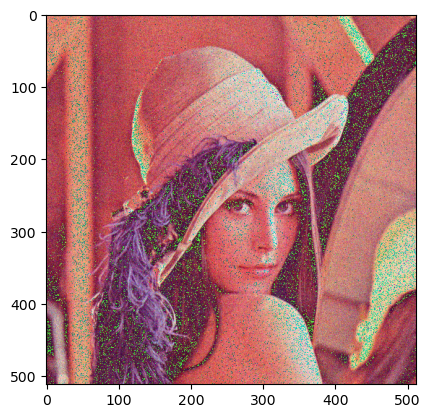

In [ ]:
new_image = image + Noise # cộng nhiễu vào ảnh gốc
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) # chuyển bgr sang rgb và hiển thị
plt.show() # hiển thị ra màn hình

At the same time, we can multiply the elements of two arrays of equal shape. We can multiply the random image and the Lenna image and plot the result. 


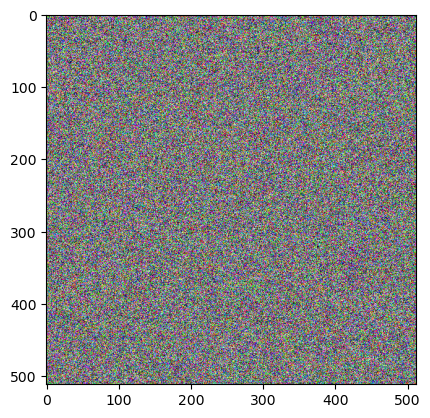

In [ ]:
new_image = image*Noise # nhân ảnh với nhiễu
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) # chuyển bgr sang rgb và hiển thị
plt.show() # hiển thị ra màn hình

## Matrix Operations 


Grayscale images are matrices. Consider the following grayscale image:


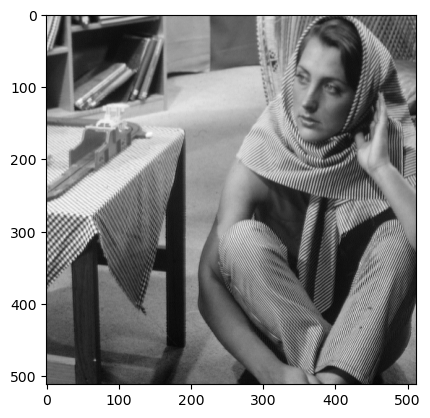

In [ ]:
im_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE) # đọc ảnh ở chế độ xám
im_gray.shape # xem kích thước ảnh

plt.imshow(im_gray,cmap='gray') # hiển thị ảnh xám
plt.show() # hiển thị ra màn hình

We can apply algorithms designed for matrices.  We can use  Singular Value Decomposition, decomposing our image matrix into  a product of three matrices.


In [ ]:
U, s, V = np.linalg.svd(im_gray , full_matrices=True) # phân rã svd ma trận ảnh xám

We see <code>s</code> is not rectangular:


In [ ]:
s.shape # xem kích thước vector giá trị suy biến

(512,)

We can convert  <code>s</code> to a diagonal matrix <code>S</code>:


In [ ]:
S = np.zeros((im_gray.shape[0], im_gray.shape[1])) # tạo ma trận S toàn số 0
S[:image.shape[0], :image.shape[0]] = np.diag(s) # gán đường chéo chứa các giá trị suy biến

We can plot the matrix `U` and `V`:


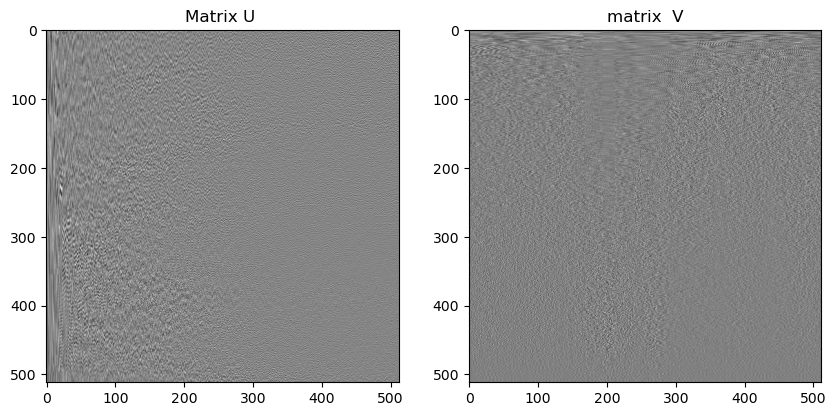

In [ ]:
plot_image(U,V,title_1="Matrix U ",title_2="matrix  V") # hiển thị ma trận U và V

We see most of the elements in `S` are zero:


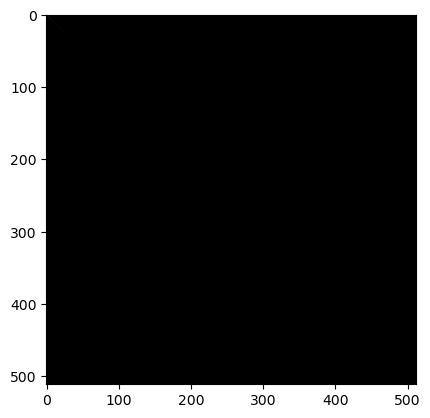

In [ ]:
plt.imshow(S,cmap='gray') # hiển thị ma trận S dưới dạng ảnh xám
plt.show() # hiển thị ra màn hình

We can find the matrix product of all the matrices. First, we can perform matrix multiplication on `S` and `U` and assign it  to `B` and plot the results: 


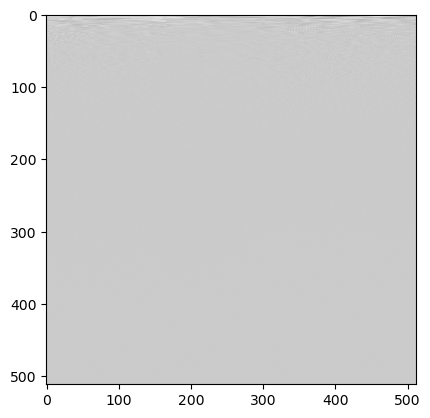

In [ ]:
B = S.dot(V) # nhân ma trận S với V
plt.imshow(B,cmap='gray') # hiển thị ảnh kết quả
plt.show() # hiển thị ra màn hình

We can find the matrix product of `U`, `S`, and `B`. We see it’s the entire image:


In [ ]:
A = U.dot(B) # nhân ma trận U với B để tái tạo ảnh

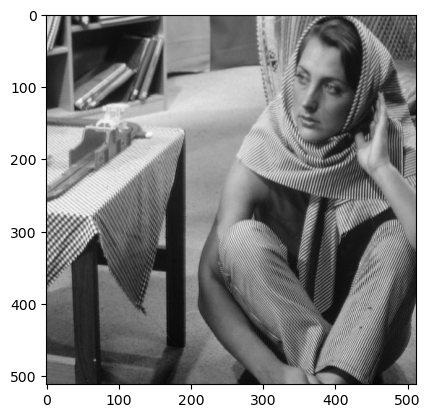

In [ ]:
plt.imshow(A,cmap='gray') # hiển thị ảnh tái tạo
plt.show() # hiển thị ra màn hình

It turns out many elements are redundant, so we can eliminate some rows and columns of `S` and `V` and approximate the image by finding the product.


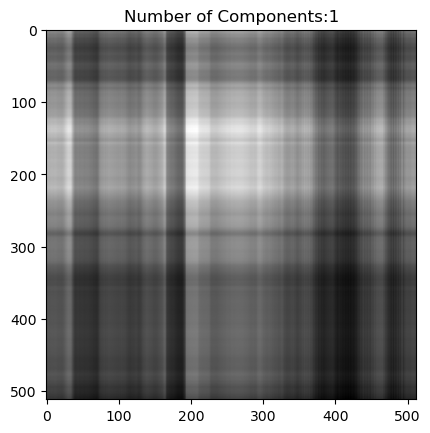

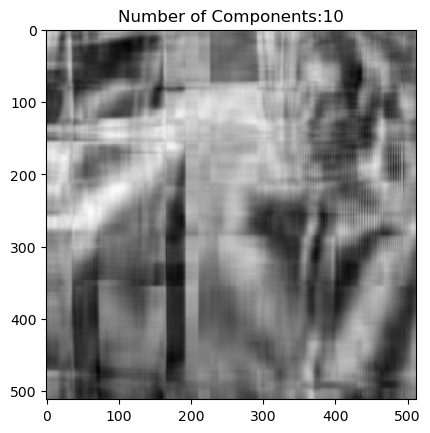

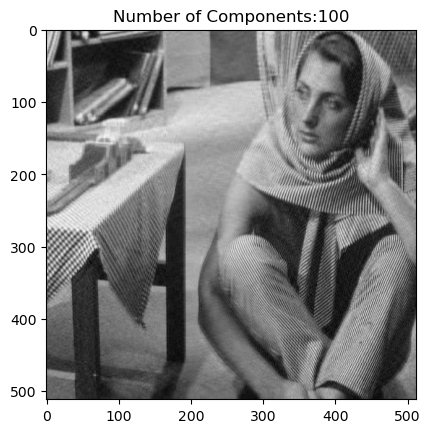

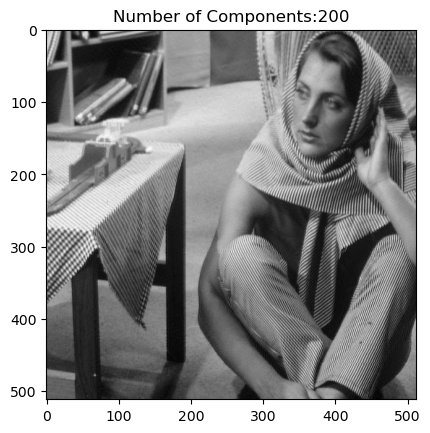

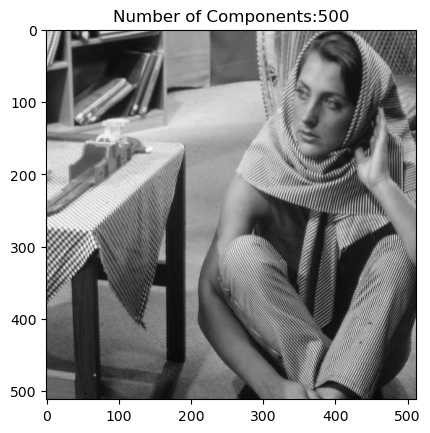

In [ ]:
for n_component in [1,10,100,200, 500]: # lặp qua các số lượng thành phần svd khác nhau
    S_new = S[:, :n_component] # lấy n_component cột đầu của S
    V_new = V[:n_component, :] # lấy n_component hàng đầu của V
    A = U.dot(S_new.dot(V_new)) # tái tạo ảnh từ các thành phần đã chọn
    plt.imshow(A,cmap='gray') # hiển thị ảnh tái tạo
    plt.title("Number of Components:"+str(n_component)) # đặt tiêu đề theo số thành phần
    plt.show() # hiển thị ra màn hình

We see we only need 100 to 200 Components to represent the image.


# References 


[1]  Images were taken from: https://homepages.cae.wisc.edu/~ece533/images/
    
[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html'>Pillow Docs</a>

[3]  <a href='https://opencv.org/'>Open CV</a>

[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).

[5 ] Jian, Wushuai, Xueyan Sun, and Shuqian Luo. "Computer-aided diagnosis of breast microcalcifications based on dual-tree complex wavelet transform." Biomedical engineering online 11.1 (2012): 1-12.


<!--<h2>Change Log</h2>-->


<!--
<table>
    <tr>
        <th>Date (YYYY-MM-DD)</th>
        <th>Version</th>
        <th>Changed By</th>
        <th>Change Description</th>
    </tr>
    <tr>
        <td>2020-07-20</td>
        <td>0.2</td>
        <td>Azim</td>
        <td>Modified Multiple Areas</td>
    </tr>
    <tr>
        <td>2020-07-17</td>
        <td>0.1</td>
        <td>Azim</td>
        <td>Created Lab Template</td>
    </tr>
</table>
-->



<h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
